# Bank Marketing Case Study

In [456]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #importing libraries
df=pd.read_csv(r'C:\Users\Dell\Desktop\jupyter\bank.csv')#reading csv file

# Data Quality Checking

In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [458]:
df.isnull().sum() #finding null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Checking Outliers

In [459]:
df.describe(percentiles=[0.25,0.5,0.75,0.85,0.99])# using describe function finding out percentiles

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
85%,53.000000,2747.000000,27.000000,458.000000,4.000000,101.000000,1.000000
99%,72.000000,14194.600000,31.000000,1259.000000,16.000000,370.000000,8.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [460]:
df['balance'].mean() #mean of balance columns

1422.6578190665782

In [461]:
df['balance'].median()#median of balance columns

444.0

In [462]:
#converting columns which contains yes or no to 0 and 1 here yes=1 and no=0
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing']=df['loan'].map({'yes': 1, 'no': 0})
df['loan']=df['loan'].map({'yes':1, 'no':0})
df['y']=df['y'].map({'yes' :1,'no':0}) 

In [463]:
#bining the duration column  and creating a new column duration_range
bins1 = [0,500,1000,1500,2000,2500,3000,4000]
slot1 = ['0-500', '500-1000','1000-1500', '1500-2000', '2000-2500','2500-3000','3000 and above']
df['duration_range'] = pd.cut(df['duration'], bins1, labels=slot1)

In [464]:
#creating bins of age column
bins = [0, 10, 20, 30, 40, 50, 60,70,80,90]
slot = ['0-10', '10-20','20-30', '30-40', '40-50','50-60','60-70','70-80','80 and above']
df['age_range'] = pd.cut(df['age'], bins, labels=slot)

In [465]:
df.head()#display

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duration_range,age_range
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0,0-500,20-30
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0,0-500,30-40
2,35,management,single,tertiary,0,1350,0,0,cellular,16,apr,185,1,330,1,failure,0,0-500,30-40
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0,0-500,20-30
4,59,blue-collar,married,secondary,0,0,0,0,unknown,5,may,226,1,-1,0,unknown,0,0-500,50-60


# DATA VISUALIZATION

# UNIVARIATE ANALYSIS

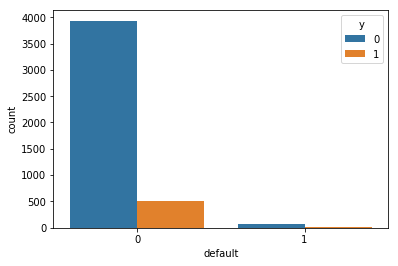

In [466]:
sns.countplot(x='default',hue='y',data=df)#countplot of default column which counts the number of defaulties and non defaults
plt.show()

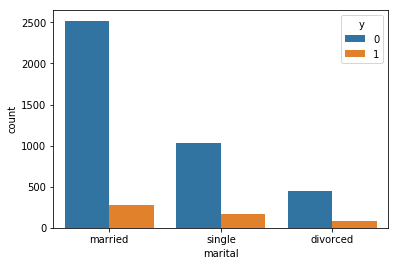

In [467]:
# shows count of marital column
sns.countplot(x='marital',hue='y',data=df)
plt.show()

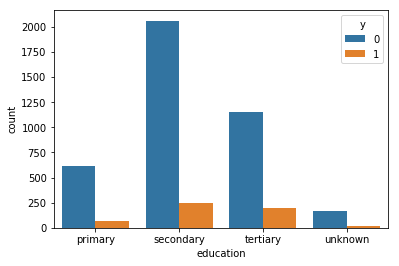

In [468]:
#count of different types of education
sns.countplot(x='education',hue='y',data=df)
plt.show()

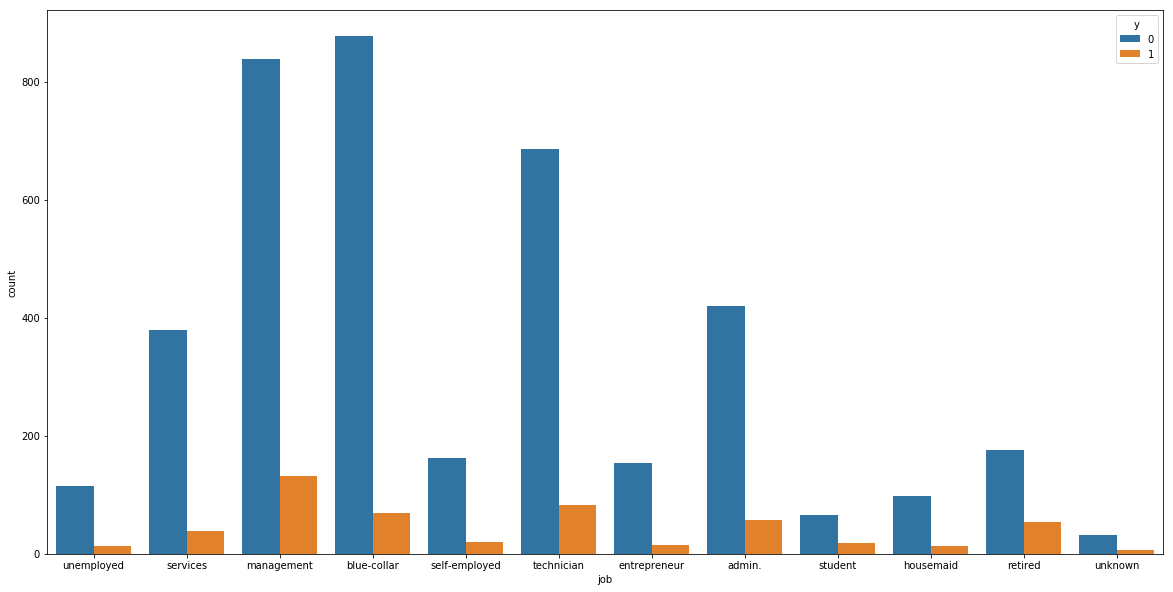

In [469]:
#counts of different types of job
plt.figure(figsize=(20,10))
sns.countplot(x='job',hue='y',data=df)
plt.show()

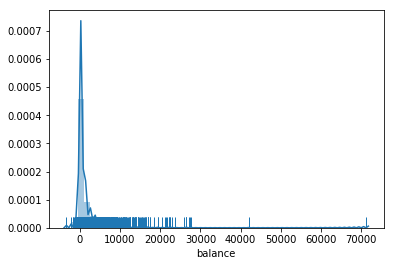

In [470]:
#displot of balance column in which customer have not subscribed
sns.distplot(df[df['y']==0]['balance'],rug=True)
plt.show()

This above plot shows that data is left skewed.

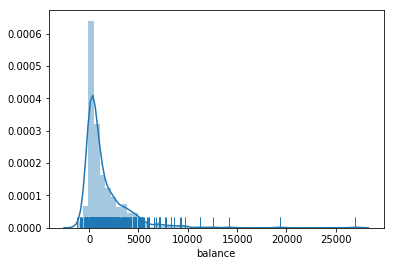

In [471]:
sns.distplot(df[df['y']==1]['balance'],rug=True)
plt.show()#displot of balance column in which customer have subscribed

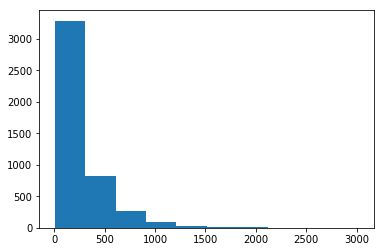

In [472]:
plt.hist(df['duration'])
plt.show()#histogram of duration column

# BIVARIATE ANALYSIS

In [473]:
df['balance'].min()

-3313

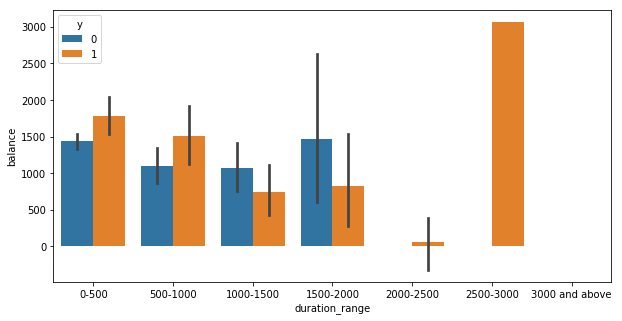

In [474]:
plt.figure(figsize=(10,5))
sns.barplot(x='duration_range',y='balance',hue='y',data=df)
plt.show()

# Data Preparation

CREATING DUMMY VARIABLES

In [475]:
dummy=pd.get_dummies(df[['job','marital','education','contact','poutcome','month']],drop_first=True)
df=pd.concat([df,dummy],axis=1)# concating new dummy variable with dataframe

In [476]:
df.shape# checking shape of dataframe

(4521, 51)

In [477]:
df.info()# info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 51 columns):
age                    4521 non-null int64
job                    4521 non-null object
marital                4521 non-null object
education              4521 non-null object
default                4521 non-null int64
balance                4521 non-null int64
housing                4521 non-null int64
loan                   4521 non-null int64
contact                4521 non-null object
day                    4521 non-null int64
month                  4521 non-null object
duration               4521 non-null int64
campaign               4521 non-null int64
pdays                  4521 non-null int64
previous               4521 non-null int64
poutcome               4521 non-null object
y                      4521 non-null int64
duration_range         4521 non-null category
age_range              4521 non-null category
job_blue-collar        4521 non-null uint8
job_entrepreneur     

In [478]:
remove=['job','marital','education','contact','poutcome','month','age_range','duration_range']
df=df.drop(remove,axis=1) # removing the reduntant variables

In [479]:
df.shape #again checking shape

(4521, 43)

# Complete and clean Dataset

In [480]:
pd.set_option('display.max_columns',43)# displaying all the columns
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,0,1787,0,0,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,33,0,4789,1,1,11,220,1,339,4,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,35,0,1350,0,0,16,185,1,330,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,59,0,0,0,0,5,226,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0


CHECKING FOR OUTLIERS

In [481]:
df.describe(percentiles=[0.25,0.5,0.75,0.85,0.99]) 

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,0.016810,1422.657819,0.152842,0.152842,15.915284,263.961292,2.793630,39.766645,0.542579,0.115240,0.209246,0.037160,0.024773,0.214333,0.050874,0.040478,0.092236,0.018580,0.169874,0.028312,0.008405,0.618668,0.264543,0.510064,0.298607,0.041363,0.066578,0.292856,0.043574,0.028534,0.819509,0.140013,0.004424,0.049104,0.032736,0.156160,0.117452,0.010838,0.309224,0.086043,0.017695,0.011502
std,10.576211,0.128575,3009.638142,0.359875,0.359875,8.247667,259.856633,3.109807,100.121124,1.693562,0.319347,0.406815,0.189174,0.155451,0.410404,0.219764,0.197099,0.289391,0.135051,0.375564,0.165882,0.091304,0.485767,0.441138,0.499954,0.457697,0.199149,0.249318,0.455123,0.204169,0.166510,0.384638,0.347039,0.066372,0.216109,0.177965,0.363047,0.321994,0.103553,0.462225,0.280458,0.131856,0.106640
min,19.000000,0.000000,-3313.000000,0.000000,0.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,69.000000,0.000000,0.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,444.000000,0.000000,0.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,0.000000,1480.000000,0.000000,0.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
85%,53.000000,0.000000,2747.000000,1.000000,1.000000,27.000000,458.000000,4.000000,101.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
99%,72.000000,1.000000,14194.600000,1.000000,1.000000,31.000000,1259.000000,16.000000,370.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000

In [482]:
from sklearn.model_selection import train_test_split #importing sklearn libraries for train test split

In [483]:
x=df.drop(['y'],axis=1) #x contains the variable for training model

In [484]:
y=df['y'] #y is a target variable
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [485]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100) # splitting into train and test

In [486]:
from sklearn.preprocessing import StandardScaler #importing scaler libraries

In [487]:
x_train.head()#display

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
2085,33,0,-77,0,0,28,151,3,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1239,28,0,4229,1,1,5,205,2,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
130,41,0,168,0,0,18,187,3,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2345,26,0,512,1,1,30,206,5,239,3,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1296,58,0,2,0,0,16,684,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [488]:
import warnings
warnings.filterwarnings('ignore') #importing warnings libraries

In [489]:
scaler = StandardScaler()# scaling continuous variable

x_train[['age','balance','day','duration','campaign','pdays','previous']] = scaler.fit_transform(x_train[['age','balance','day','duration','campaign','pdays','previous']])

x_train.head() 

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
2085,-0.781696,0,-0.490292,0,0,1.447256,-0.427557,0.045752,-0.402013,-0.318746,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1239,-1.259091,0,0.905722,1,1,-1.323076,-0.225129,-0.258364,-0.402013,-0.318746,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
130,-0.017865,0,-0.410863,0,0,0.242764,-0.292605,0.045752,-0.402013,-0.318746,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2345,-1.450049,0,-0.299337,1,1,1.688155,-0.221381,0.653984,2.002237,1.486467,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1296,1.605278,0,-0.464680,0,0,0.001865,1.570479,-0.562480,-0.402013,-0.318746,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [490]:
y = (sum(df['y'])/len(df['y'].index))*100
y # finding percentage of customer subscribed

11.523999115239992

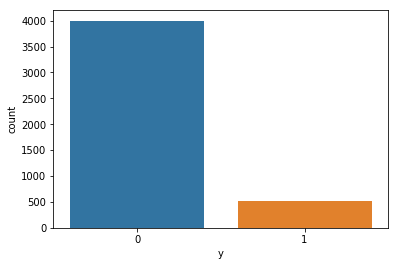

In [491]:
sns.countplot(df['y'])
plt.show() #countplot of y variable

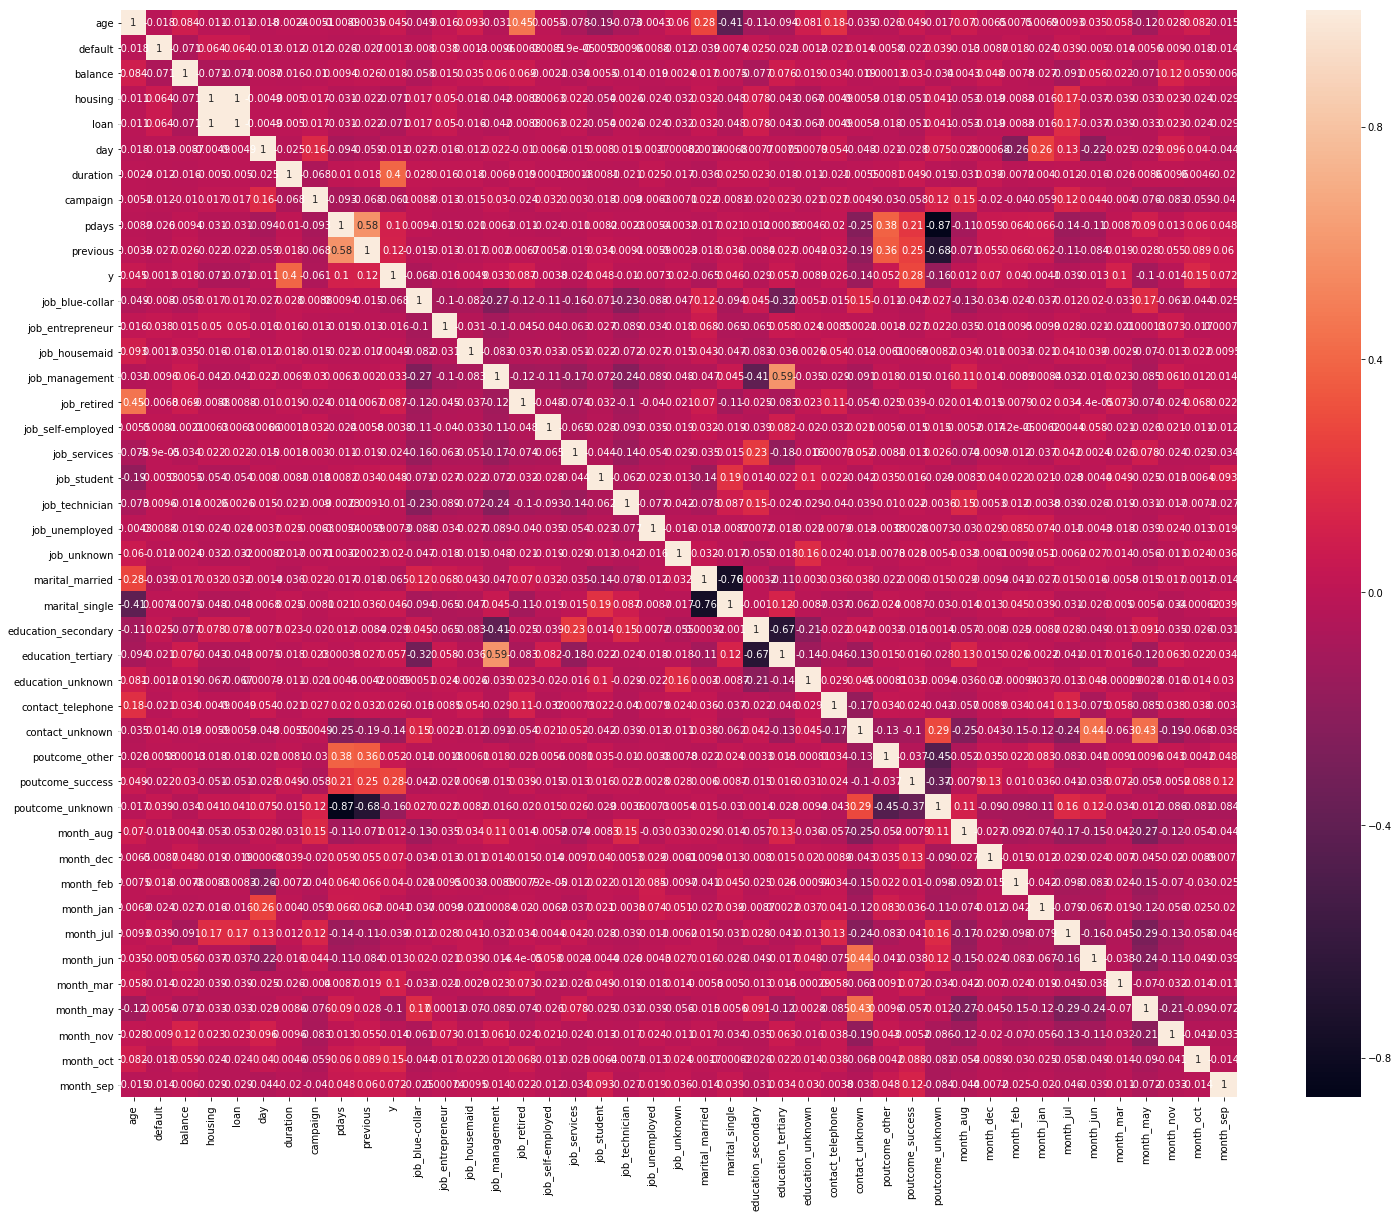

In [492]:
plt.figure(figsize = (25,20))        # Size of the figure
sns.heatmap(df.corr(),annot = True)
plt.show() #plotting heatmap to find correlation

In [493]:
x_train.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
2085,-0.781696,0,-0.490292,0,0,1.447256,-0.427557,0.045752,-0.402013,-0.318746,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1239,-1.259091,0,0.905722,1,1,-1.323076,-0.225129,-0.258364,-0.402013,-0.318746,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
130,-0.017865,0,-0.410863,0,0,0.242764,-0.292605,0.045752,-0.402013,-0.318746,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2345,-1.450049,0,-0.299337,1,1,1.688155,-0.221381,0.653984,2.002237,1.486467,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1296,1.605278,0,-0.464680,0,0,0.001865,1.570479,-0.562480,-0.402013,-0.318746,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [494]:
# droping the highly correlated feature variable
x_test=x_test.drop(['job_blue-collar','job_management','marital_married','education_secondary','poutcome_other','poutcome_success'],axis=1)
x_train=x_train.drop(['job_blue-collar','job_management','marital_married','education_secondary','poutcome_other','poutcome_success'],axis=1)

# MODEL BUILDING

In [495]:
import statsmodels.api as sm #importing stats model

In [496]:
logm1 = sm.GLM(y_train.astype(float),(sm.add_constant(x_train.astype(float))), family = sm.families.Binomial())#adding constant
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3128
Model Family:                Binomial   Df Model:                           35
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Wed, 31 Jul 2019   Deviance:                          nan
Time:                        20:39:46   Pearson chi2:                 2.28e+18
No. Iterations:                   100   Covariance Type:             nonrobust
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.992e+14   7.57e+06   6.59e+07      0.000    4.99e+14    4.99e+14
age                 3.934e+13   1.55e+06   2.54e+07      0.000    3.93e+13    3.93e+13
default            -1.067e+14   8.98e+06  -1.19e+07      0.000   -1.07e+14   -1.07e+14
balance            -7.863e+13   1.23e+06   -6.4e+07      0.000   -7.86e+13   -7.86e+13
housing            -1.699e+14   1.68e+06  -1.01e+08      0.000    -1.7e+14    -1.7e+14
loan               -1.699e+14   1.68e+06  -1.01e+08      0.000    -1.7e+14    -1.7e+14
day                  5.25e+13   1.38e+06   3.79e+07      0.000    5.25e+13    5.25e+13
duration            6.076e+14    1.2e+06   5.04e+08      0.000    6.08e+14    6.08e+14
campaign           -3.983e+13   1.27e+06  -3.14e+07      0.000   -3.98e+13   -3.98e+13
pdays               -9.11e+13   2.48e+06  -3.67e+07      0.000   -9.11e+13   -9.11e+13
previous            7.415e+12   1.65e+06   4.49e+06      0.000    7.42e+12    7.42e+12
job_entrepreneur   -1.608e+14    6.8e+06  -2.36e+07      0.000   -1.61e+14   -1.61e+14
job_housemaid       3.318e+13   7.84e+06   4.23e+06      0.000    3.32e+13    3.32e+13
job_retired         2.346e+14    6.3e+06   3.72e+07      0.000    2.35e+14    2.35e+14
job_self-employed   1.049e+13   6.18e+06    1.7e+06      0.000    1.05e+13    1.05e+13
job_services        1.607e+14   4.35e+06    3.7e+07      0.000    1.61e+14    1.61e+14
job_student         1.388e+13   1.02e+07   1.37e+06      0.000    1.39e+13    1.39e+13
job_technician      1.967e+13   3.37e+06   5.84e+06      0.000    1.97e+13    1.97e+13
job_unemployed     -2.468e+14   7.31e+06  -3.38e+07      0.000   -2.47e+14   -2.47e+14
job_unknown        -1.079e+14   1.35e+07  -7.98e+06      0.000   -1.08e+14   -1.08e+14
marital_single      9.487e+13   3.05e+06   3.11e+07      0.000    9.49e+13    9.49e+13
education_tertiary  5.707e+13   2.78e+06   2.05e+07      0.000    5.71e+13    5.71e+13
education_unknown    -1.9e+14   6.29e+06  -3.02e+07      0.000    -1.9e+14    -1.9e+14
contact_telephone  -9.333e+12   5.03e+06  -1.85e+06      0.000   -9.33e+12   -9.33e+12
contact_unknown    -3.643e+14   4.09e+06  -8.91e+07      0.000   -3.64e+14   -3.64e+14
poutcome_unknown   -3.981e+14   7.27e+06  -5.48e+07      0.000   -3.98e+14   -3.98e+14
month_aug          -4.933e+14   5.98e+06  -8.25e+07      0.000   -4.93e+14   -4.93e+14
month_dec           1.159e+14   1.76e+07    6.6e+06      0.000    1.16e+14    1.16e+14
month_feb          -5.846e+14   7.61e+06  -7.68e+07      0.000   -5.85e+14   -5.85e+14
month_jan          -5.611e+14   8.36e+06  -6.71e+07      0.000   -5.61e+14   -5.61e+14
month_jul          -6.751e+14   5.83e+06  -1.16e+08      0.000   -6.75e+14   -6.75e+14
month_jun          -1.723e+14   6.89e+06   -2.5e+07      0.000   -1.72e+14   -1.72e+14
month_mar           1.957e+14   1.19e+07   1.65e+07      0.000    1.96e+14    1.96e+14
month_may          -7.633e+14 

# FEATURE SELECTION USING RFE

In [504]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0,class_weight='balanced') #model building 

In [505]:
x_train.shape#checking shape of train datasets

(3164, 36)

In [506]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg,18)             # running RFE with 13 variables as output
rfe = rfe.fit(x_train, y_train) #fitting variable required for training into model

In [507]:
rfe.support_

array([False,  True, False, False,  True, False,  True, False, False,
       False,  True, False,  True,  True, False,  True, False,  True,
       False, False, False, False, False,  True,  True,  True, False,
       False,  True,  True, False,  True,  True,  True,  True,  True])

In [508]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))#checking the rank of variable

[('age', False, 18),
 ('default', True, 1),
 ('balance', False, 19),
 ('housing', False, 2),
 ('loan', True, 1),
 ('day', False, 17),
 ('duration', True, 1),
 ('campaign', False, 3),
 ('pdays', False, 13),
 ('previous', False, 16),
 ('job_entrepreneur', True, 1),
 ('job_housemaid', False, 11),
 ('job_retired', True, 1),
 ('job_self-employed', True, 1),
 ('job_services', False, 14),
 ('job_student', True, 1),
 ('job_technician', False, 15),
 ('job_unemployed', True, 1),
 ('job_unknown', False, 5),
 ('marital_single', False, 10),
 ('education_tertiary', False, 4),
 ('education_unknown', False, 8),
 ('contact_telephone', False, 6),
 ('contact_unknown', True, 1),
 ('poutcome_unknown', True, 1),
 ('month_aug', True, 1),
 ('month_dec', False, 7),
 ('month_feb', False, 12),
 ('month_jan', True, 1),
 ('month_jul', True, 1),
 ('month_jun', False, 9),
 ('month_mar', True, 1),
 ('month_may', True, 1),
 ('month_nov', True, 1),
 ('month_oct', True, 1),
 ('month_sep', True, 1)]

In [509]:
col = x_train.columns[rfe.support_]

In [510]:
x_train.columns[~rfe.support_]

Index(['age', 'balance', 'housing', 'day', 'campaign', 'pdays', 'previous',
       'job_housemaid', 'job_services', 'job_technician', 'job_unknown',
       'marital_single', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'month_dec', 'month_feb', 'month_jun'],
      dtype='object')

In [511]:
x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())# using generalised linear model
res = logm2.fit()#model fitting
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3145
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -839.97
Date:                Wed, 31 Jul 2019   Deviance:                       1679.9
Time:                        20:46:16   Pearson chi2:                 4.33e+03
No. Iterations:                     6   Covariance Type:             nonrobust
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9262      0.151     -6.127      0.000      -1.222      -0.630
default               0.7549      0.463      1.631      0.103      -0.152       1.662
loan                 -0.7564      0.223     -3.393      0.001      -1.193      -0.319
duration              1.0461      0.061     17.073      0.000       0.926       1.166
job_entrepreneur     -0.7423      0.440     -1.688      0.091      -1.604       0.120
job_retired           0.7287      0.231      3.148      0.002       0.275       1.182
job_self-employed    -0.2651      0.377     -0.703      0.482      -1.004       0.474
job_student           0.1621      0.426      0.381      0.703      -0.673       0.997
job_unemployed       -0.7483      0.458     -1.633      0.103      -1.647       0.150
contact_unknown      -1.2943      0.219     -5.905      0.000      -1.724      -0.865
poutcome_unknown     -0.6870      0.155     -4.437      0.000      -0.991      -0.384
month_aug            -0.5934      0.211     -2.818      0.005      -1.006      -0.181
month_jan            -0.9420      0.372     -2.531      0.011      -1.671      -0.213
month_jul            -1.2082      0.237     -5.099      0.000      -1.673      -0.744
month_mar             1.2036      0.371      3.248      0.001       0.477       1.930
month_may            -1.0551      0.191     -5.535      0.000      -1.429      -0.681
month_nov            -0.9580      0.255     -3.762      0.000      -1.457      -0.459
month_oct             1.1879      0.329      3.611      0.000       0.543       1.833
month_sep             0.9483      0.410      2.314      0.021       0.145       1.751
=====================================================================================
"""

In [512]:
x_train=x_train.drop(['job_student'],axis=1)#droping job_student variable

In [518]:
rfe=RFE(logreg,15)#selecting 15 variable for training model 
rfe=rfe.fit(x_train,y_train)

In [520]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('age', False, 19),
 ('default', False, 2),
 ('balance', False, 21),
 ('housing', False, 4),
 ('loan', True, 1),
 ('day', False, 20),
 ('duration', True, 1),
 ('campaign', False, 5),
 ('pdays', False, 15),
 ('previous', False, 18),
 ('job_entrepreneur', True, 1),
 ('job_housemaid', False, 13),
 ('job_retired', True, 1),
 ('job_self-employed', False, 3),
 ('job_services', False, 17),
 ('job_technician', False, 16),
 ('job_unemployed', True, 1),
 ('job_unknown', False, 7),
 ('marital_single', False, 12),
 ('education_tertiary', False, 6),
 ('education_unknown', False, 10),
 ('contact_telephone', False, 8),
 ('contact_unknown', True, 1),
 ('poutcome_unknown', True, 1),
 ('month_aug', True, 1),
 ('month_dec', False, 9),
 ('month_feb', False, 14),
 ('month_jan', True, 1),
 ('month_jul', True, 1),
 ('month_jun', False, 11),
 ('month_mar', True, 1),
 ('month_may', True, 1),
 ('month_nov', True, 1),
 ('month_oct', True, 1),
 ('month_sep', True, 1)]

In [521]:
col=x_train.columns[rfe.support_]
col

Index(['loan', 'duration', 'job_entrepreneur', 'job_retired', 'job_unemployed',
       'contact_unknown', 'poutcome_unknown', 'month_aug', 'month_jan',
       'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep'],
      dtype='object')

In [522]:
x_train.columns[~rfe.support_]

Index(['age', 'default', 'balance', 'housing', 'day', 'campaign', 'pdays',
       'previous', 'job_housemaid', 'job_self-employed', 'job_services',
       'job_technician', 'job_unknown', 'marital_single', 'education_tertiary',
       'education_unknown', 'contact_telephone', 'month_dec', 'month_feb',
       'month_jun'],
      dtype='object')

Assessing Model with Stats Model

In [523]:
x_train_sm=sm.add_constant(x_train[col])
logm3=sm.GLM(y_train.astype(float),x_train_sm.astype(float),family=sm.families.Binomial())#using generalised linear model
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3148
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -841.45
Date:                Wed, 31 Jul 2019   Deviance:                       1682.9
Time:                        20:52:50   Pearson chi2:                 4.29e+03
No. Iterations:                     6   Covariance Type:             nonrobust
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.9248      0.150     -6.167      0.000      -1.219      -0.631
loan                -0.7500      0.223     -3.366      0.001      -1.187      -0.313
duration             1.0432      0.061     17.046      0.000       0.923       1.163
job_entrepreneur    -0.6653      0.434     -1.532      0.126      -1.517       0.186
job_retired          0.7333      0.231      3.178      0.001       0.281       1.185
job_unemployed      -0.7519      0.458     -1.642      0.101      -1.649       0.146
contact_unknown     -1.3033      0.219     -5.954      0.000      -1.732      -0.874
poutcome_unknown    -0.6776      0.154     -4.387      0.000      -0.980      -0.375
month_aug           -0.5932      0.210     -2.820      0.005      -1.005      -0.181
month_jan           -0.9502      0.371     -2.562      0.010      -1.677      -0.223
month_jul           -1.2131      0.237     -5.126      0.000      -1.677      -0.749
month_mar            1.2075      0.369      3.270      0.001       0.484       1.931
month_may           -1.0494      0.190     -5.515      0.000      -1.422      -0.676
month_nov           -0.9645      0.255     -3.788      0.000      -1.464      -0.465
month_oct            1.1667      0.328      3.556      0.000       0.524       1.810
month_sep            0.9672      0.402      2.404      0.016       0.179       1.756
====================================================================================
"""

In [524]:
x_train=x_train.drop(['job_entrepreneur'],axis=1)

In [525]:
rfe=RFE(logreg,15)
rfe=rfe.fit(x_train,y_train)

In [526]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('age', False, 18),
 ('default', True, 1),
 ('balance', False, 20),
 ('housing', False, 2),
 ('loan', True, 1),
 ('day', False, 19),
 ('duration', True, 1),
 ('campaign', False, 4),
 ('pdays', False, 14),
 ('previous', False, 16),
 ('job_housemaid', False, 12),
 ('job_retired', True, 1),
 ('job_self-employed', False, 3),
 ('job_services', False, 15),
 ('job_technician', False, 17),
 ('job_unemployed', True, 1),
 ('job_unknown', False, 6),
 ('marital_single', False, 11),
 ('education_tertiary', False, 5),
 ('education_unknown', False, 9),
 ('contact_telephone', False, 8),
 ('contact_unknown', True, 1),
 ('poutcome_unknown', True, 1),
 ('month_aug', True, 1),
 ('month_dec', False, 7),
 ('month_feb', False, 13),
 ('month_jan', True, 1),
 ('month_jul', True, 1),
 ('month_jun', False, 10),
 ('month_mar', True, 1),
 ('month_may', True, 1),
 ('month_nov', True, 1),
 ('month_oct', True, 1),
 ('month_sep', True, 1)]

In [527]:
col=x_train.columns[rfe.support_]
col

Index(['default', 'loan', 'duration', 'job_retired', 'job_unemployed',
       'contact_unknown', 'poutcome_unknown', 'month_aug', 'month_jan',
       'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep'],
      dtype='object')

In [528]:
x_train.columns[~rfe.support_]

Index(['age', 'balance', 'housing', 'day', 'campaign', 'pdays', 'previous',
       'job_housemaid', 'job_self-employed', 'job_services', 'job_technician',
       'job_unknown', 'marital_single', 'education_tertiary',
       'education_unknown', 'contact_telephone', 'month_dec', 'month_feb',
       'month_jun'],
      dtype='object')

In [529]:
x_train_sm=sm.add_constant(x_train[col])
logm4=sm.GLM(y_train.astype(float),x_train_sm.astype(float),family=sm.families.Binomial())
res=logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3148
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -841.88
Date:                Wed, 31 Jul 2019   Deviance:                       1683.8
Time:                        20:55:48   Pearson chi2:                 4.20e+03
No. Iterations:                     6   Covariance Type:             nonrobust
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.9437      0.150     -6.289      0.000      -1.238      -0.650
default              0.6554      0.467      1.405      0.160      -0.259       1.570
loan                -0.7728      0.223     -3.468      0.001      -1.209      -0.336
duration             1.0361      0.061     17.077      0.000       0.917       1.155
job_retired          0.7535      0.231      3.268      0.001       0.302       1.205
job_unemployed      -0.7184      0.457     -1.570      0.116      -1.615       0.178
contact_unknown     -1.2914      0.218     -5.914      0.000      -1.719      -0.863
poutcome_unknown    -0.6901      0.155     -4.457      0.000      -0.994      -0.387
month_aug           -0.5788      0.210     -2.756      0.006      -0.991      -0.167
month_jan           -0.9263      0.370     -2.500      0.012      -1.652      -0.200
month_jul           -1.2313      0.237     -5.197      0.000      -1.696      -0.767
month_mar            1.2289      0.370      3.324      0.001       0.504       1.953
month_may           -1.0502      0.190     -5.523      0.000      -1.423      -0.678
month_nov           -0.9955      0.255     -3.908      0.000      -1.495      -0.496
month_oct            1.1780      0.328      3.594      0.000       0.536       1.820
month_sep            0.9881      0.403      2.454      0.014       0.199       1.777
====================================================================================
"""

In [530]:
y_train_pred=res.predict(x_train_sm) #making predictions
y_train_pred[:10]

2085    0.035295
1239    0.024363
130     0.050571
2345    0.053547
1296    0.214480
318     0.204694
2461    0.093122
1764    0.081666
2636    0.029481
2578    0.050997
dtype: float64

In [531]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03529454, 0.02436256, 0.05057136, 0.0535466 , 0.21448044,
       0.2046941 , 0.09312161, 0.08166622, 0.02948104, 0.0509975 ])

In [532]:
#creating new dataframe with actual y and predicted probability of y 
y_train_pred_final = pd.DataFrame({'y':y_train.values, 'y_Prob':y_train_pred})
y_train_pred_final.head()

,y,y_Prob
0,0,0.035295
1,0,0.024363
2,0,0.050571
3,0,0.053547
4,0,0.214480


In [539]:
#creating new column of predicted if y>0.27 then customer will subscribed otherwise not subscribed
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.27 else 0)

# Let's see the head
y_train_pred_final.head()

,y,y_Prob,predicted
0,0,0.035295,0
1,0,0.024363,0
2,0,0.050571,0
3,0,0.053547,0
4,0,0.214480,0


In [534]:
from sklearn import metrics

In [540]:
#creating confusion metric
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
print(confusion)

[[2600  185]
 [ 182  197]]


In [374]:
# Predicted     not_churn    churn
# Actual
# not_churn        2594      191 
# churn            179       200

In [541]:
#checking accuracy of final y and predicted y
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted))

0.884007585335019


CHECKING VIFS

In [543]:
from statsmodels.stats.outliers_influence import variance_inflation_factor# import Libraries for vifs for outliers

In [544]:
vif = pd.DataFrame() #creating dataframe
vif['Features'] = x_train[col].columns #creating features column
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])] #creating vif column
vif['VIF'] = round(vif['VIF'], 2) # rounding off vif values
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,poutcome_unknown,4.51
5,contact_unknown,2.42
9,month_jul,1.82
11,month_may,1.82
7,month_aug,1.63
1,loan,1.24
12,month_nov,1.22
8,month_jan,1.08
3,job_retired,1.07
4,job_unemployed,1.04


In [551]:
x_train_sm = sm.add_constant(x_train[col])#adding constant
logm5 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())#using general linear model
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3164
Model:                            GLM   Df Residuals:                     3148
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -841.88
Date:                Wed, 31 Jul 2019   Deviance:                       1683.8
Time:                        21:02:37   Pearson chi2:                 4.20e+03
No. Iterations:                     6   Covariance Type:             nonrobust
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.9437      0.150     -6.289      0.000      -1.238      -0.650
default              0.6554      0.467      1.405      0.160      -0.259       1.570
loan                -0.7728      0.223     -3.468      0.001      -1.209      -0.336
duration             1.0361      0.061     17.077      0.000       0.917       1.155
job_retired          0.7535      0.231      3.268      0.001       0.302       1.205
job_unemployed      -0.7184      0.457     -1.570      0.116      -1.615       0.178
contact_unknown     -1.2914      0.218     -5.914      0.000      -1.719      -0.863
poutcome_unknown    -0.6901      0.155     -4.457      0.000      -0.994      -0.387
month_aug           -0.5788      0.210     -2.756      0.006      -0.991      -0.167
month_jan           -0.9263      0.370     -2.500      0.012      -1.652      -0.200
month_jul           -1.2313      0.237     -5.197      0.000      -1.696      -0.767
month_mar            1.2289      0.370      3.324      0.001       0.504       1.953
month_may           -1.0502      0.190     -5.523      0.000      -1.423      -0.678
month_nov           -0.9955      0.255     -3.908      0.000      -1.495      -0.496
month_oct            1.1780      0.328      3.594      0.000       0.536       1.820
month_sep            0.9881      0.403      2.454      0.014       0.199       1.777
====================================================================================
"""

In [552]:
y_train_pred = res.predict(x_train_sm).values.reshape(-1)

In [553]:
y_train_pred[:10]

array([0.03529454, 0.02436256, 0.05057136, 0.0535466 , 0.21448044,
       0.2046941 , 0.09312161, 0.08166622, 0.02948104, 0.0509975 ])

In [554]:
y_train_pred_final['y_Prob'] = y_train_pred

In [555]:
y_train_pred_final['predicted'] = y_train_pred_final.y_Prob.map(lambda x: 1 if x > 0.27 else 0)
y_train_pred_final.head()

,y,y_Prob,predicted
0,0,0.035295,0
1,0,0.024363,0
2,0,0.050571,0
3,0,0.053547,0
4,0,0.214480,0


In [556]:
print(metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted)) #accuary of actual and predicted data

0.884007585335019


In [557]:
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
confusion

array([[2600,  185],
       [ 182,  197]], dtype=int64)

In [558]:
metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.predicted)

0.884007585335019

In [559]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [560]:
# checking sensitivity
TP / float(TP+FN)

0.5197889182058048

In [561]:
#checking specifity
TN / float(TN+FP)

0.933572710951526

ROC CURVE

In [562]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [563]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.y, y_train_pred_final.y_Prob, drop_intermediate = False )

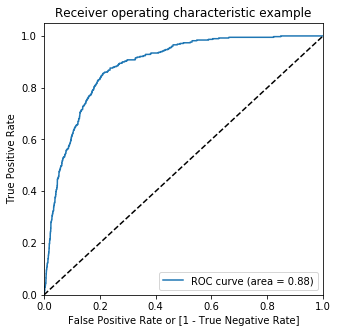

In [564]:
draw_roc(y_train_pred_final.y, y_train_pred_final.y_Prob)#drawing ROC curve

In above plot true positive rate is 88% 

In [565]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.y_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,y,y_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.035295,0,1,0,0,0,0,0,0,0,0,0
1,0,0.024363,0,1,0,0,0,0,0,0,0,0,0
2,0,0.050571,0,1,0,0,0,0,0,0,0,0,0
3,0,0.053547,0,1,0,0,0,0,0,0,0,0,0
4,0,0.214480,0,1,1,1,0,0,0,0,0,0,0


In [566]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.119785  1.000000  0.000000
0.1   0.1  0.776865  0.875989  0.763375
0.2   0.2  0.862200  0.635884  0.892998
0.3   0.3  0.888116  0.477573  0.943986
0.4   0.4  0.889697  0.345646  0.963734
0.5   0.5  0.889064  0.240106  0.977379
0.6   0.6  0.884956  0.160950  0.983483
0.7   0.7  0.884008  0.110818  0.989228
0.8   0.8  0.882111  0.068602  0.992819
0.9   0.9  0.880531  0.036939  0.995332


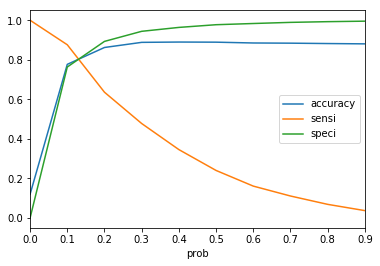

In [567]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [568]:
y_train_pred_final['final_predicted'] = y_train_pred_final.y_Prob.map( lambda x: 1 if x > 0.18 else 0)

y_train_pred_final.head()

,y,y_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.035295,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.024363,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.050571,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.053547,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.214480,0,1,1,1,0,0,0,0,0,0,0,1


In [569]:
metrics.accuracy_score(y_train_pred_final.y, y_train_pred_final.final_predicted)

0.8527180783817951

In [570]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.final_predicted )
confusion2

array([[2447,  338],
       [ 128,  251]], dtype=int64)

In [571]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [572]:
#checking sensitivity
TP / float(TP+FN) #true positive percent

0.662269129287599

In [573]:
#checking specificity
TN / float(TN+FP)#true negative percent

0.8786355475763016

In [574]:
print(FP/ float(TN+FP))

0.12136445242369838


In [575]:
print (TP / float(TP+FP))

0.42614601018675724


In [576]:
print (TN / float(TN+ FN))

0.9502912621359223


In [577]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.y, y_train_pred_final.predicted )
confusion

array([[2600,  185],
       [ 182,  197]], dtype=int64)

In [578]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.5157068062827225

In [579]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.5197889182058048

In [580]:
from sklearn.metrics import precision_score,recall_score

In [581]:
#calculating precision
precision_score(y_train_pred_final.y,y_train_pred_final.predicted)

0.5157068062827225

In [582]:
#calculating recall value
recall_score(y_train_pred_final.y,y_train_pred_final.predicted)

0.5197889182058048

In [583]:
from sklearn.metrics import precision_recall_curve

In [584]:
y_train_pred_final.y,y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       0
 8       0
 9       0
 10      0
 11      0
 12      0
 13      0
 14      0
 15      0
 16      1
 17      0
 18      0
 19      0
 20      0
 21      0
 22      0
 23      0
 24      0
 25      0
 26      0
 27      0
 28      0
 29      0
        ..
 3134    0
 3135    0
 3136    0
 3137    0
 3138    0
 3139    0
 3140    0
 3141    1
 3142    0
 3143    0
 3144    0
 3145    0
 3146    0
 3147    0
 3148    0
 3149    0
 3150    0
 3151    0
 3152    0
 3153    1
 3154    0
 3155    0
 3156    0
 3157    0
 3158    0
 3159    0
 3160    0
 3161    0
 3162    0
 3163    0
 Name: y, Length: 3164, dtype: int64, 0       0
 1       0
 2       0
 3       0
 4       0
 5       0
 6       0
 7       0
 8       0
 9       0
 10      1
 11      0
 12      0
 13      0
 14      0
 15      0
 16      1
 17      0
 18      0
 19      1
 20      0
 21      0
 22      0
 23      0
 24      0
 25      0
 26   

In [585]:
p,r,thresholds=precision_recall_curve(y_train_pred_final.y,y_train_pred_final.y_Prob)

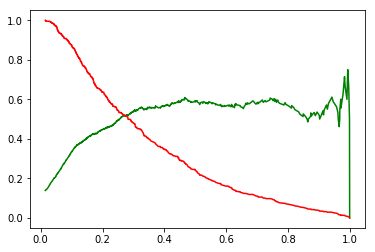

In [586]:
#plotting the precision and recall curve
plt.plot(thresholds,p[:-1],"g-")
plt.plot(thresholds,r[:-1],"r-")
plt.show()

# EVALUATING THE MODEL

In [587]:
x_test[['age','balance','day','duration','campaign','pdays','previous']] = scaler.fit_transform(x_test[['age','balance','day','duration','campaign','pdays','previous']])


In [588]:
x_test=x_test[col]
x_test.head()

,default,loan,duration,job_retired,job_unemployed,contact_unknown,poutcome_unknown,month_aug,month_jan,month_jul,month_mar,month_may,month_nov,month_oct,month_sep
3731,0,0,-0.487534,1,0,0,0,0,0,0,0,0,1,0,0
2367,0,0,1.472335,0,0,1,1,0,0,0,0,1,0,0,0
1166,0,0,0.237124,0,0,0,0,0,0,0,0,0,0,0,0
2973,0,1,1.583504,0,0,1,1,0,0,0,0,1,0,0,0
2139,0,0,-0.104618,0,0,0,1,0,0,1,0,0,0,0,0


In [589]:
x_test_sm=sm.add_constant(x_test)

In [590]:
y_test_pred=res.predict(x_test_sm)

In [591]:
y_test_pred[:10]

3731    0.155661
2367    0.079437
1166    0.332244
2973    0.042795
2139    0.048637
731     0.029595
1640    0.010602
4208    0.036909
2152    0.023366
107     0.174434
dtype: float64

In [592]:
y_pred_1=pd.DataFrame(y_test_pred)

In [593]:
y_pred_1.head()

,0
3731,0.155661
2367,0.079437
1166,0.332244
2973,0.042795
2139,0.048637


In [594]:
y_test_df=pd.DataFrame(y_test)

In [595]:
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [596]:
y_pred_final=pd.concat([y_test_df,y_pred_1],axis=1) #creating dataframe y_test_df and y_pred_1

In [597]:
y_pred_final.head()

,y,0
0,0,0.155661
1,0,0.079437
2,1,0.332244
3,1,0.042795
4,0,0.048637


In [598]:
y_pred_final=y_pred_final.rename(columns={0: 'y_Prob'})#renaming the columns of a dataframe

In [599]:
y_pred_final=y_pred_final.reindex_axis(['y','y_Prob'],axis=1) #reindeing the columns of a dataframe

In [600]:
y_pred_final.head()

,y,y_Prob
0,0,0.155661
1,0,0.079437
2,1,0.332244
3,1,0.042795
4,0,0.048637


In [601]:
y_pred_final['final_predicted']=y_pred_final.y_Prob.map(lambda x:1 if x>0.27 else 0)

In [602]:
y_pred_final.head()

,y,y_Prob,final_predicted
0,0,0.155661,0
1,0,0.079437,0
2,1,0.332244,1
3,1,0.042795,0
4,0,0.048637,0


In [603]:
#checking accuracy
metrics.accuracy_score(y_pred_final.y, y_pred_final.final_predicted)

0.8894620486366986

In [604]:
#confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.y, y_pred_final.final_predicted )
confusion2

array([[1127,   88],
       [  62,   80]], dtype=int64)

In [605]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [606]:
#checking sensitivity
TP / float(TP+FN)

0.5633802816901409

In [607]:
#checking specificity
TN / float(TN+FP)

0.9275720164609054

# Calculating R2_score

In [608]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)#calculating r2 score

0.24428327112634507